In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import lime
import lime.lime_tabular
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter('ignore')
from docx import Document
from docx.shared import Inches


In [6]:
fao_data = pd.read_csv("~/Documents/Kaleb-Bsc thesis/Crop yield and agricultural practices/datasets/latest0705.csv", index_col='Unnamed: 0')

fao_data

,Nutrient nitrogen N (total) - tonnes,Nutrient phosphate P2O5 (total) - tonnes,Nutrient potash K2O (total) - tonnes,Item,Yield(tonnes/ha),Fung & Bact – Benzimidazoles,"Fung & Bact – Diazines, morpholines",Fung & Bact – Dithiocarbamates,Fung & Bact – Inorganics,Fung & Bact – Other,...,Plant Growth Regulators-1,Plant Growth Regulators-2,Rodenticides – Other-1,Rodenticides – Other-2,Herbicides – Bipiridils-1,Herbicides – Bipiridils-2,Herbicides – Sulfonyl ureas-1,Herbicides – Sulfonyl ureas-2,Rodenticides – Anti-coagulants-1,Rodenticides – Anti-coagulants-2
1990-01-01,0.0,0.0,0.0,Apples,26.3272,0.0,0.0,0.0,0.0,0.0,...,1910.0,1910.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
1990-01-01,0.0,0.0,0.0,Apricots,2.5781,0.0,0.0,0.0,0.0,0.0,...,1910.0,1910.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
1990-01-01,0.0,0.0,0.0,Cherries,5.0828,0.0,0.0,0.0,0.0,0.0,...,1910.0,1910.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
1990-01-01,0.0,0.0,0.0,Currants,7.0383,0.0,0.0,0.0,0.0,0.0,...,1910.0,1910.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
1990-01-01,0.0,0.0,0.0,Gooseberries,6.8081,0.0,0.0,0.0,0.0,0.0,...,1910.0,1910.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-01,0.0,0.0,0.0,Mixed grain,-5.8863,0.0,0.0,0.0,0.0,0.0,...,0.0,144.0,0.0,6.0,0.0,-84.0,0.0,4.0,0.1,0.1
2020-01-01,0.0,0.0,0.0,Oats,0.8941,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1
2020-01-01,0.0,0.0,0.0,Rye,0.9290,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1
2020-01-01,0.0,0.0,0.0,Triticale,0.4421,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1


In [28]:
# cat_names = fao_data['Category'].unique()
cat_names = ['Fruits and Nuts']
cat_names

['Fruits and Nuts']

Intercept 10.518608297390642
Prediction_local [11.12749905]
Right: 9.060877800000009


,Features_Fruits and Nuts,Coeffcients (RandomForest)_Fruits and Nuts
0,Rodenticides – Other-1 <= 0.50,1.125754
1,Fall <= 0.00,1.029184
2,Insecticides – Other-1 <= 0.39,-0.922252
3,0.00 < Spring <= 1.00,-0.916120
4,Herbicides – Phenoxy hormone products-2 <= 0.52,0.814083
5,Herbicides – Carbamates-1 <= 0.51,0.736995
6,Nutrient nitrogen N (total) - tonnes-1 <= 0.51,-0.697863
7,Herbicides – Urea derivates-2 <= 0.51,0.653496
8,"Fung & Bact – Diazines, morpholines <= 0.51",-0.636675
9,"Fung & Bact – Diazines, morpholines-1 <= 0.51",-0.577711


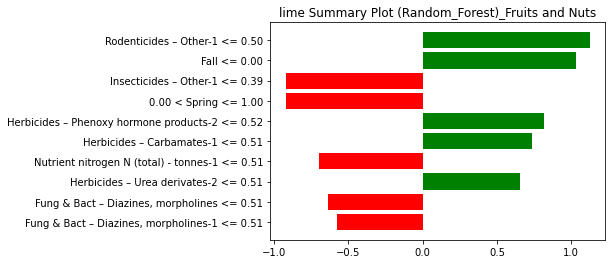

In [30]:
doc = Document()
scaler = MinMaxScaler()
for cat in cat_names:
    crop_df = fao_data[fao_data['Category'] == cat]
    encoded_df = pd.get_dummies(crop_df[["Crop_season"]], prefix='', prefix_sep='')
    encoded_df = encoded_df.drop(encoded_df.columns[-2], axis=1)
    y = crop_df[['Yield(tonnes/ha)']]
    x = crop_df.drop(['Yield(tonnes/ha)', "Item", "Category", "Crop_season"], axis=1)
    x = pd.concat([x, encoded_df], axis=1)
    original_index = x.index
    mean = x.mean()
    std = x.std()
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std
    x = x.clip(lower_bound, upper_bound, axis=1)
    x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
    x.index = original_index
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
    #display(pd.DataFrame(x_test).iloc[-1])



    
    regressor = RandomForestRegressor(n_estimators = 500, random_state = 42) #max_depth= 150)
    regressor.fit(x_train, y_train)
    
    #prediction of new value
    y_pred = regressor.predict(x_test)
    #prediction of new value
    y_pred = regressor.predict(x_test)
    explainer = lime.lime_tabular.LimeTabularExplainer(np.array(x_train),
                    feature_names=pd.DataFrame(x_test).columns, 
                    class_names=['Yield(tonnes/ha)'], verbose=True, mode='regression')
    #exp = explainer.explain_instance(pd.DataFrame(x_test).iloc[-1]
    exp = explainer.explain_instance(pd.DataFrame(x_test).iloc[-1],
    regressor.predict, num_features=10)
    exp_list = exp.as_list()
    exp_list = [(feat, abs(coeff)) for feat, coeff in exp_list] # add absolute value of coefficients
    exp_list.sort(key=lambda x: x[1], reverse=True)
    exp.as_pyplot_figure()
    plt.title("lime Summary Plot (Random_Forest)_" + cat)
    display(pd.DataFrame(exp.as_list(),  columns=['Features_' + cat, 'Coeffcients (RandomForest)_' + cat]))


Intercept 10.041626830878418
Prediction_local [8.77266001]
Right: 3.1995723999999877


,Features_Fruits and Nuts,Coeffcients (RandomForest)_Fruits and Nuts
0,Yield(tonnes/ha)-1 > 0.48,-4.754391
1,Fall <= 0.00,1.498520
2,Fung & Bact – Inorganics <= 0.50,-1.476493
3,Spring <= 0.00,1.273487
4,Insecticides – Other <= 0.39,1.080880
5,Herbicides – Sulfonyl ureas-1 <= 0.50,0.844328
6,"Fung & Bact – Diazines, morpholines-1 <= 0.51",0.824872
7,Herbicides – Urea derivates-2 <= 0.51,-0.694861
8,Nutrient phosphate P2O5 (total) - tonnes <= 0.52,0.629750
9,Rodenticides – Other <= 0.50,-0.495059


Intercept 96.54969108392733
Prediction_local [23.89363571]
Right: 19.28767339999997


,Features_Vegetables and Legumes,Coeffcients (RandomForest)_Vegetables and Legumes
0,Summer <= 0.00,-65.891487
1,0.04 < Yield(tonnes/ha)-1 <= 0.21,8.981128
2,0.20 < Yield(tonnes/ha)-2 <= 0.38,-5.994784
3,Fung & Bact – Dithiocarbamates-1 <= 0.51,-4.441178
4,"Fung & Bact – Diazines, morpholines-2 <= 0.51",-2.827831
5,Fall <= 0.00,-2.493312
6,Insecticides – Organo-phosphates <= 0.51,-2.435151
7,Herbicides – Phenoxy hormone products-1 <= 0.52,2.425090
8,Insecticides – Other <= 0.43,2.354523
9,Herbicides – Phenoxy hormone products <= 0.52,-2.333054


Intercept 0.7465240242309564
Prediction_local [0.49933954]
Right: 1.0532657999999993


,Features_Cereals,Coeffcients (RandomForest)_Cereals
0,Summer <= 0.00,-1.834319
1,0.54 < Yield(tonnes/ha)-1 <= 0.64,1.179001
2,0.00 < Fall <= 1.00,0.479427
3,Herbicides – Phenoxy hormone products <= 0.53,-0.382887
4,Fung & Bact – Inorganics-2 <= 0.50,-0.182002
5,Fung & Bact – Other-1 <= 0.50,0.167655
6,Insecticides – Carbamates <= 0.51,0.160147
7,Insecticides – Carbamates-1 <= 0.51,0.159837
8,Herbicides – Carbamates <= 0.51,0.154922
9,"Fung & Bact – Triazoles, diazoles-1 <= 0.50",-0.148966


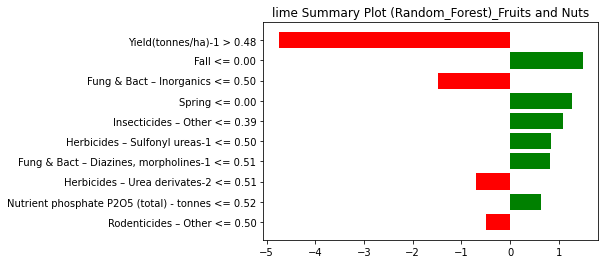

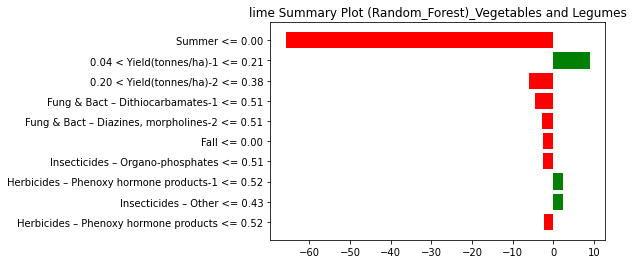

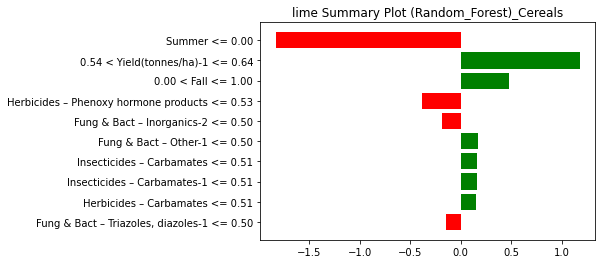

In [14]:
doc = Document()
scaler = MinMaxScaler()
for cat in cat_names:
    crop_df = fao_data[fao_data['Category'] == cat]
    encoded_df = pd.get_dummies(crop_df[["Crop_season"]], prefix='', prefix_sep='')
    encoded_df = encoded_df.drop(encoded_df.columns[-2], axis=1)
    y = crop_df[['Yield(tonnes/ha)']]
    x = crop_df.drop(['Yield(tonnes/ha)', "Item", "Category", "Crop_season"], axis=1)
    x = pd.concat([x, encoded_df], axis=1)
    original_index = x.index
    mean = x.mean()
    std = x.std()
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std
    x = x.clip(lower_bound, upper_bound, axis=1)
    x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
    x.index = original_index
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
    #display(pd.DataFrame(x_test).iloc[-1])



    
    regressor = RandomForestRegressor(n_estimators = 500, random_state = 42) #max_depth= 150)
    regressor.fit(x_train, y_train)
    
    #prediction of new value
    y_pred = regressor.predict(x_test)
    #prediction of new value
    y_pred = regressor.predict(x_test)
    explainer = lime.lime_tabular.LimeTabularExplainer(np.array(x_train),
                    feature_names=pd.DataFrame(x_test).columns, 
                    class_names=['Yield(tonnes/ha)'], verbose=True, mode='regression')
    #exp = explainer.explain_instance(pd.DataFrame(x_test).iloc[-1]
    exp = explainer.explain_instance(pd.DataFrame(x_test).iloc[0],
    regressor.predict, num_features=10)
    exp_list = exp.as_list()
    exp_list = [(feat, abs(coeff)) for feat, coeff in exp_list] # add absolute value of coefficients
    exp_list.sort(key=lambda x: x[1], reverse=True)
    exp.as_pyplot_figure()
    plt.title("lime Summary Plot (Random_Forest)_" + cat)
    display(pd.DataFrame(exp.as_list(),  columns=['Features_' + cat, 'Coeffcients (RandomForest)_' + cat]))

    
    # create a table for Lime results
    table = doc.add_table(rows=1, cols=2)
    hdr_cells = table.rows[0].cells
    hdr_cells[0].text = 'Features_' + cat
    hdr_cells[1].text = 'Coefficients (RandomForest)_' + cat
    
    for feature, coefficient in exp.as_list():
        row_cells = table.add_row().cells
        row_cells[0].text = str(feature)
        row_cells[1].text = str(coefficient)

    # add a page break
    doc.add_page_break()

# save the Word document
doc.save('lime_results_random_forest.docx')
   

    
   
